In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
corr=df.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


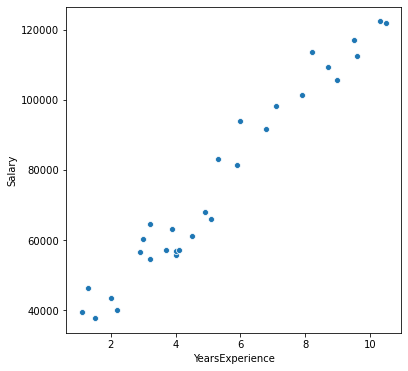

In [7]:
# graphical univariate analysis 
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x="YearsExperience",y="Salary")
plt.show()

In [8]:
# then also i will try to make linear regression model 
x=df[['YearsExperience']] # feature
y=df[['Salary']] # target 

In [9]:
# import required modules 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [10]:
# split data 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)
# split done 70% training 30% testing based 
# random_state = we instruct split algorithm to split data randomly with 1 state

In [11]:
# Model Training 
lr=LinearRegression() # object will be created
# llearning model on given data 
# use theta0+theta1x to calculate bestfit prediction line 
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
lr.coef_ # slop 

array([[9202.23359825]])

In [13]:
lr.intercept_ # intecept 

array([26049.57771544])

In [14]:
# now model is trained and ready to predict 
# but before we use it for prediction let's check it's accuracy 
y_pred=lr.predict(x_test)

In [15]:
y_test # x_test original   y
y_pred # prediction x_test yhat 

# MSE = sum((y-yhat)**2)/n 

array([[ 74821.41578619],
       [ 91385.43626305],
       [ 61938.28874864],
       [ 81262.97930497],
       [ 67459.62890759],
       [ 88624.76618357],
       [113470.79689886],
       [ 44454.04491195],
       [106109.01002026]])

In [16]:
y_test

,Salary
17,83088.0
21,98273.0
10,63218.0
19,93940.0
14,61111.0
20,91738.0
26,116969.0
3,43525.0
24,109431.0


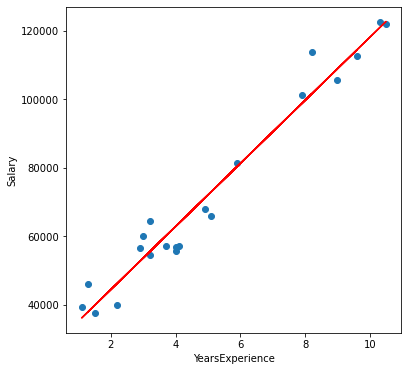

In [17]:
# draw line using sctter plot 
plt.figure(figsize=(6,6))
plt.scatter(x_train,y_train)
y_train_predict=lr.predict(x_train)
plt.plot(x_train,y_train_predict,color="red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()
# redline is yhat line 
# blue dots are orginal y 


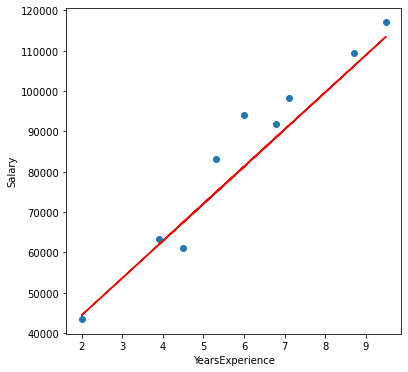

In [18]:
# draw line using sctter plot 
plt.figure(figsize=(6,6))
plt.scatter(x_test,y_test)
y_test_predict=lr.predict(x_test)
plt.plot(x_test,y_test_predict,color="red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()
# redline is yhat line 
# blue dots are orginal y 

In [23]:
# predict slaes 
newx=5 # candidate with 5 years of experience 
newy=lr.predict([[newx]])
print("your prediction for candidate with 5 years of experience is {}".format(newy))

your prediction for candidate with 5 years of experience is [[72060.74570672]]
